
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions



In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('international-airline-passengers.csv')

In [4]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
df.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [7]:
df.drop(144,axis=0,inplace=True)

In [8]:
df.tail()

,Month,Sales
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [9]:
df.tail()

,Month,Sales
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [10]:
df['Month']=pd.to_datetime(df['Month'])

In [11]:
df.head()

,Month,Sales
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [12]:
df.set_index('Month',inplace=True)

In [13]:
df.head()

,Sales
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [14]:
df.describe()

,Sales
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


## Step 2: Visualize the Data

<AxesSubplot:xlabel='Month'>

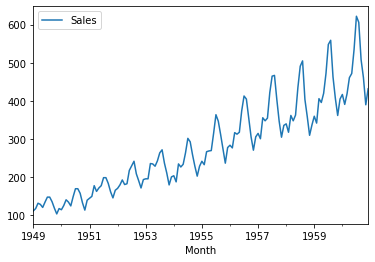

In [15]:
df.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
test_result=adfuller(df['Sales'])

In [18]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("is stationary")
    else:
        print(" it is non-stationary ")
    

In [19]:
adfuller_test(df['Sales'])

ADF Test Statistic : 0.8153688792060543
p-value : 0.9918802434376411
#Lags Used : 13
Number of Observations Used : 130
 it is non-stationary 


## Differencing

In [20]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [21]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [22]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.3830207264924805
p-value : 0.011551493085514982
#Lags Used : 1
Number of Observations Used : 130
is stationary


<AxesSubplot:xlabel='Month'>

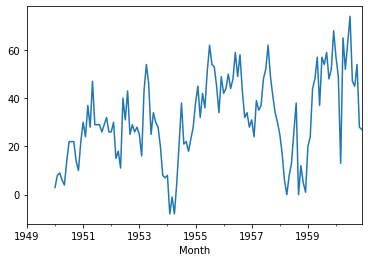

In [23]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
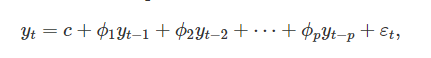

In [24]:
import statsmodels.api as sm

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. 

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

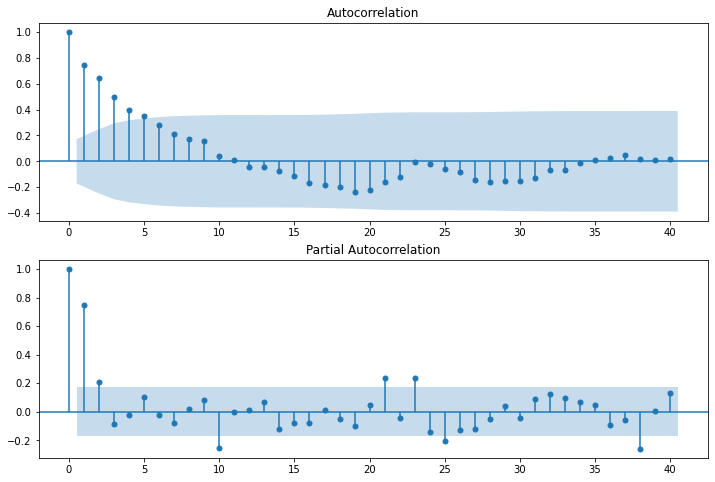

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [27]:
# For non-seasonal data
#p=4, d=1, q=10
from statsmodels.tsa.arima_model import ARIMA

In [28]:
model=ARIMA(df['Sales'],order=(4,1,10))
model_fit=model.fit()

E:\ANACONDA\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.war

In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  143
Model:                ARIMA(4, 1, 10)   Log Likelihood                -622.698
Method:                       css-mle   S.D. of innovations             17.033
Date:                Mon, 14 Jun 2021   AIC                           1277.395
Time:                        13:29:32   BIC                           1324.801
Sample:                    02-01-1949   HQIC                          1296.658
                         - 12-01-1960                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.6233      0.218     12.050      0.000       2.197       3.050
ar.L1.D.Sales      0.1577      0.062      2.557      0.011       0.037       0.279
ar.L2.D.Sales     -0.9511      0.066    -14.514      0.000      -1.080      -0.823
ar.L3.D.Sales     -0.0354      0.065     -0.541      0.589      -0.164       0.093
ar.L4.D.Sales     -0.7727      0.069    -11.187      0.000      -0.908      -0.637
ma.L1.D.Sales     -0.0438      0.076     -0.573      0.566      -0.194       0.106
ma.L2.D.Sales      1.0266      0.068     15.140      0.000       0.894       1.159
ma.L3.D.Sales      0.0826      0.092      0.903      0.367      -0.097       0.262
ma.L4.D.Sales      0.7036      0.096      7.300      0.000       0.515       0.892
ma.L5.D.Sales     -0.1638      0.101     -1.616      0.106      -0.362       0.035
ma.L6.D.Sales     -0.4184      0.100     -4.187      0.000      -0.614      -0.223
ma.L7.D.Sales     -0.3425      0.095     -3.621      0.000      -0.528      -0.157
ma.L8.D.Sales     -0.8193      0.096     -8.565      0.000      -1.007      -0.632
ma.L9.D.Sales     -0.0966      0.077     -1.252      0.211      -0.248       0.055
ma.L10.D.Sales    -0.9283      0.058    -16.003      0.000      -1.042      -0.815
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.5030           -0.8757j            1.0098           -0.1670
AR.2             0.5030           +0.8757j            1.0098            0.1670
AR.3            -0.5259           -0.9963j            1.1265           -0.3273
AR.4            -0.5259           +0.9963j            1.1265            0.3273
MA.1            -1.0769           -0.0000j            1.0769           -0.5000
MA.2            -0.6832           -0.7303j            1.0000           -0.3697
MA.3            -0.6832           +0.7303j            1.0000            0.3697
MA.4            -0.2757           -0.9613j            1.0000           -0.2945
MA.5            -0.2757           +0.9613j            1.0000            0.2945
MA.6             1.0000           -0.0000j            1.0000           -0.0000
MA.7             0.5995           -0.8006j            1.0002           -0.1477
MA.8             0.5995           +0.8006j            1.0002            0.1477
MA.9             0.3458           -0.9383j            1.0000           -0.1938
MA.10            0.3458           +0.9383j            1.0000            0.1938
------------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

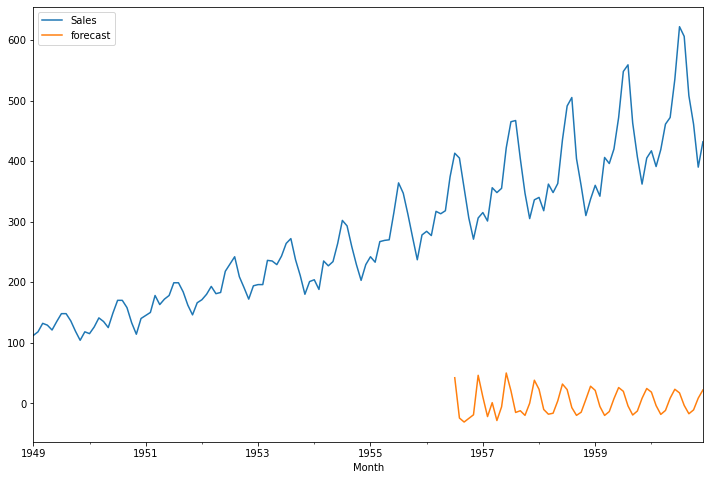

In [30]:
df['forecast']=model_fit.predict(start=90,end=143,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [31]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(4, 1, 10),seasonal_order=(4,1,10,12))
results=model.fit()

E:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\ANACONDA\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
E:\ANACONDA\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month'>

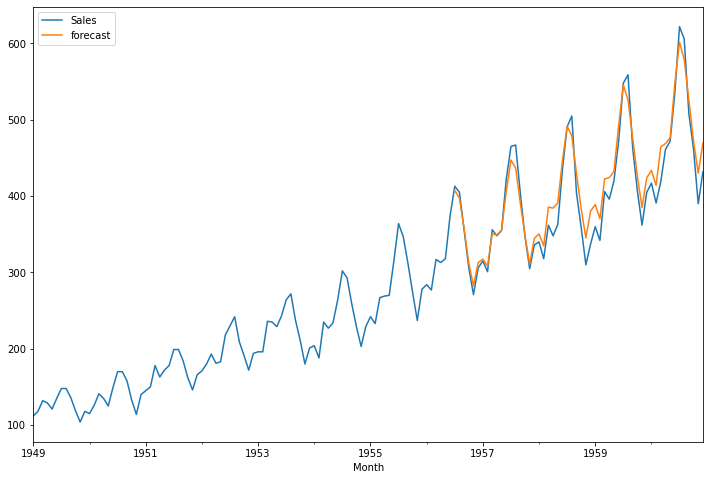

In [32]:
df['forecast']=results.predict(start=90,end=143,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [33]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [34]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [35]:
future_datest_df.head()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1961-01-01,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN


In [36]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

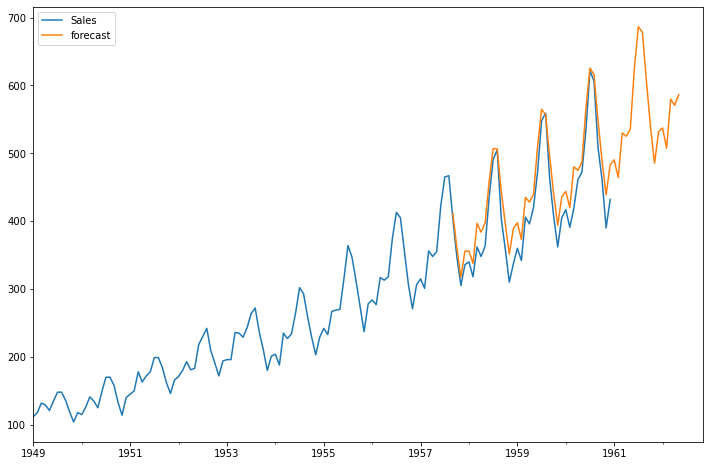

In [37]:
future_df['forecast'] = results.predict(start = 104, end = 160,dynamic=True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 